In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

# Modification 1: calculate test_signal in setup()

__Purpose__: Rather than copying and pasting a large array of data into the code, just calculate the data in setup().

## SIMULATED_SIGNAL_SELECTION is 1 (calculated raised cosine signal)

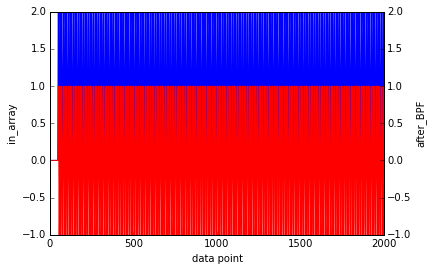

In [20]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(40, 140)

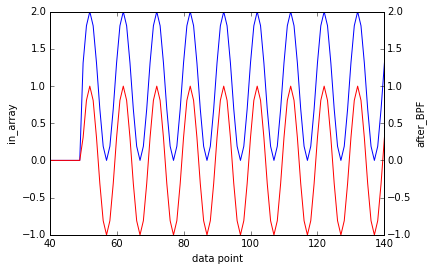

In [24]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(40,140)

## SIMULATED_SIGNAL_SELECTION is 2 (unit impulse function)

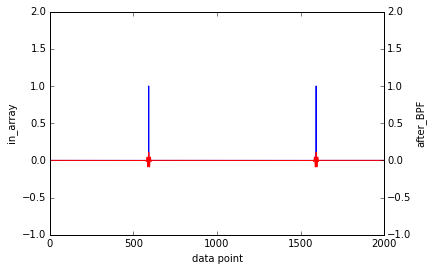

In [25]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(570, 610)

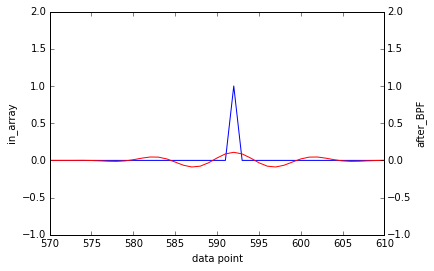

In [27]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(570,610)

__Conclusion__: Both of these work fine